In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")
# Packages
import os
import mne
from pathlib import Path
# Functions
from dataloader import load_raw, load_config
from preprocess import clean

## Dataloader

In [6]:
path='/home/sms/Github/datasets/eeg/sub01/raw_data/Rest_Outside_960420.vhdr'

Extracting parameters from /home/sms/Github/datasets/eeg/sub01/raw_data/Rest_Outside_960420.vhdr...
Setting channel info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2017-07-11 12:17:29 UTC
 nchan: 64
 projs: []
 sfreq: 5000.0 Hz
>


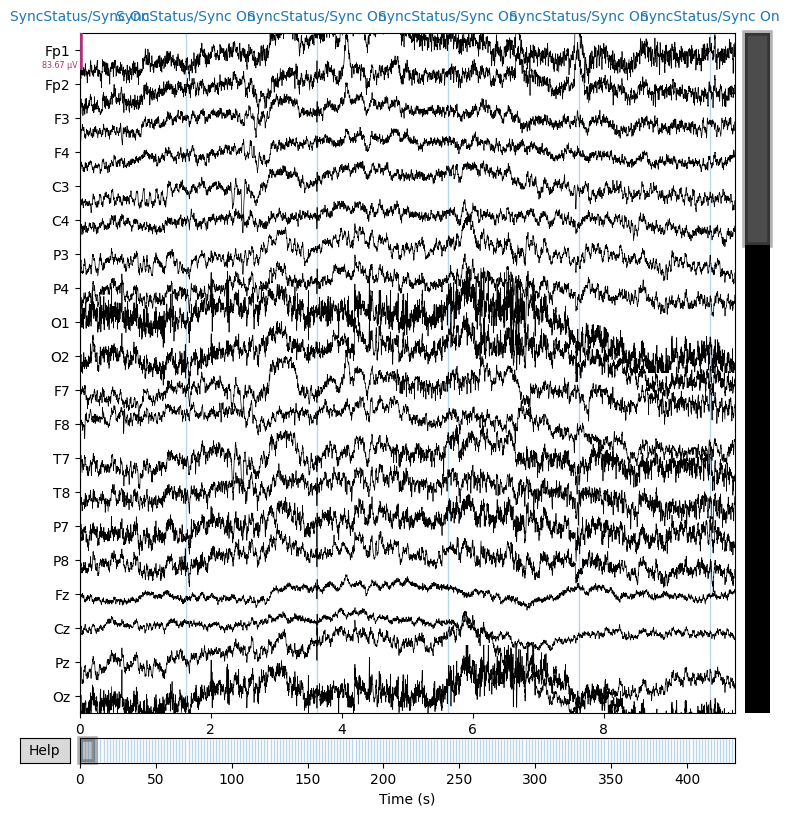

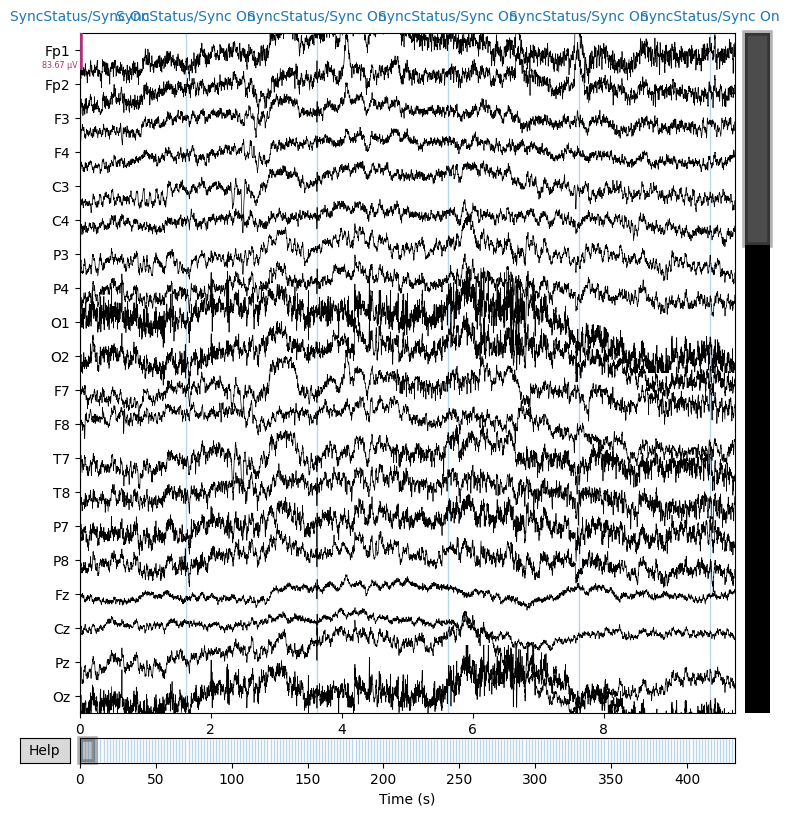

In [ ]:
eeg = load_raw(path=path)
eeg_data = eeg.get_data()
n_channels, n_samples = eeg_data.shape
print(eeg.info)
eeg.plot(scalings='auto', title="Raw EEG")

## Preprocess

In [ ]:
eeg_cleaned_data, ica_info = clean(eeg_data, sfreq=256, apply_ica=True, reject_components='auto')
print("Removed ICs:", ica_info['rejected_components'])

Removed ICs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63)]


In [ ]:
eeg_cleaned = eeg.copy()
eeg_cleaned._data = eeg_cleaned_data
eeg_cleaned.ica_object = ica_info['ica_object']
eeg_cleaned.plot(scalings='auto', title="Cleaned EEG")